In [41]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [26]:
# include points from either side of the intense point
MS1_PEAK_DELTA = 0.1

In [2]:
precursor_id = 1000

In [3]:
before_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/ms1-before-intensity-descent-precursor-{}.csv'.format(precursor_id))
after_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/ms1-after-intensity-descent-precursor-{}.csv'.format(precursor_id))


In [64]:
before_df['normalised_intensity'] = before_df.intensity / before_df.intensity.max()
after_df['normalised_intensity'] = after_df.intensity / after_df.intensity.max()

In [79]:
len(before_df)

508

In [4]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Rescale to values between 0 and 1
tableau20_mpl = tableau20.copy()
for i in range(len(tableau20_mpl)):  
    r, g, b = tableau20_mpl[i]  
    tableau20_mpl[i] = (r / 255., g / 255., b / 255.)

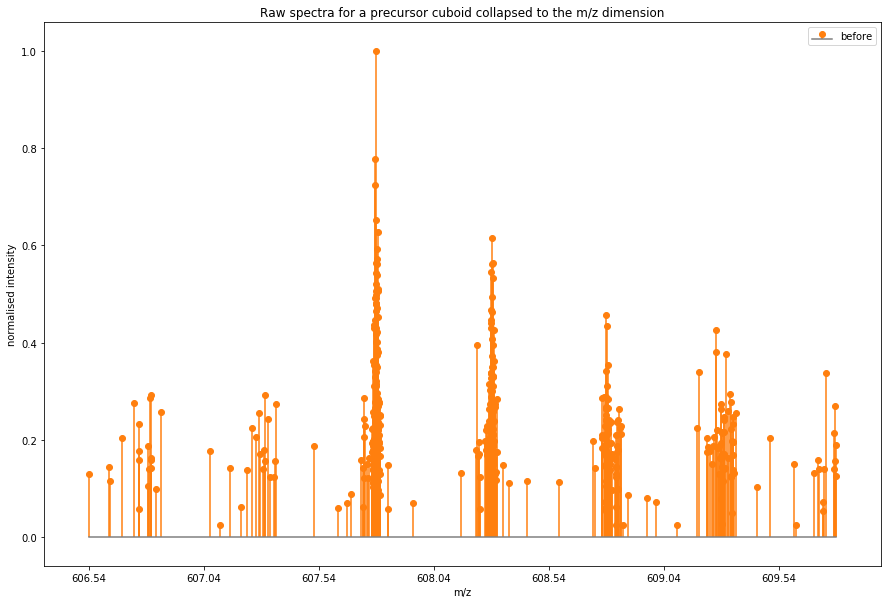

In [71]:
f, ax = plt.subplots()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

markerline, stemlines, baseline = ax.stem(before_df.mz, before_df.normalised_intensity, use_line_collection=True, label='before')
plt.setp(markerline, 'color', colors[1])
plt.setp(stemlines, 'color', colors[1])
plt.setp(baseline, 'color', colors[7])

plt.xlabel('m/z')
plt.ylabel('normalised intensity')
f.set_figheight(10)
f.set_figwidth(15)
plt.xticks(np.arange(before_df.mz.min(),before_df.mz.max(),0.5))

# plt.xlim((608.14,608.47))
# plt.ylim((-3000,3000))

plt.margins(0.06)
plt.legend(loc='best')
plt.title('Raw spectra for a precursor cuboid collapsed to the m/z dimension')
plt.show()

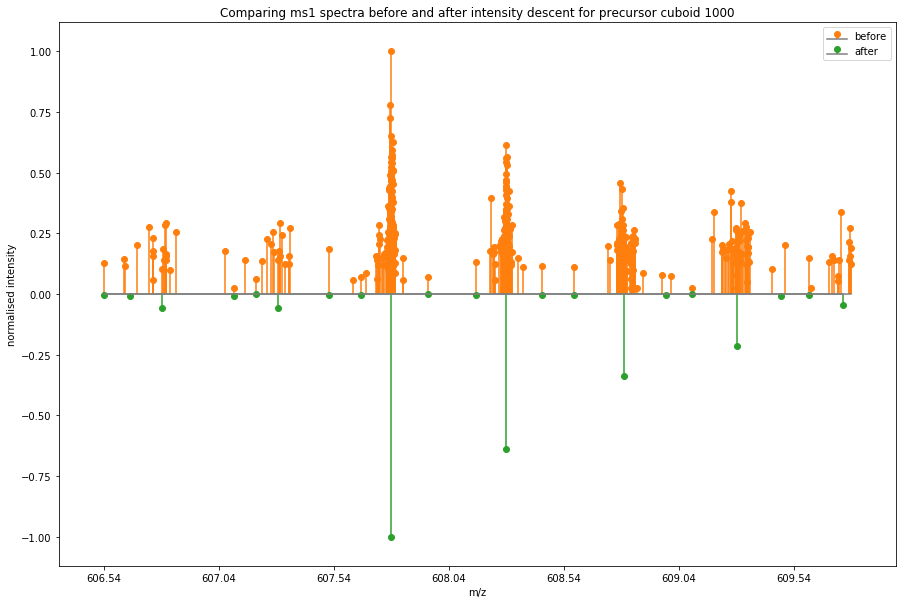

In [70]:
f, ax = plt.subplots()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

markerline, stemlines, baseline = ax.stem(before_df.mz, before_df.normalised_intensity, use_line_collection=True, label='before')
plt.setp(markerline, 'color', colors[1])
plt.setp(stemlines, 'color', colors[1])
plt.setp(baseline, 'color', colors[7])

markerline, stemlines, baseline = ax.stem(after_df.mz, -after_df.normalised_intensity, use_line_collection=True, label='after')
plt.setp(markerline, 'color', colors[2])
plt.setp(stemlines, 'color', colors[2])
plt.setp(baseline, 'color', colors[7])

plt.xlabel('m/z')
plt.ylabel('normalised intensity')
f.set_figheight(10)
f.set_figwidth(15)
plt.xticks(np.arange(before_df.mz.min(),before_df.mz.max(),0.5))

# plt.xlim((608.14,608.47))
# plt.ylim((-3000,3000))

plt.margins(0.06)
plt.legend(loc='best')
plt.title('Comparing ms1 spectra before and after intensity descent for precursor cuboid {}'.format(precursor_id))
plt.show()

In [42]:
before_df[(before_df.mz >= 608.14) & (before_df.mz <= 608.49)].intensity.idxmax()

187

In [43]:
mz_upper = before_df.loc[187].mz + MS1_PEAK_DELTA
mz_lower = before_df.loc[187].mz - MS1_PEAK_DELTA

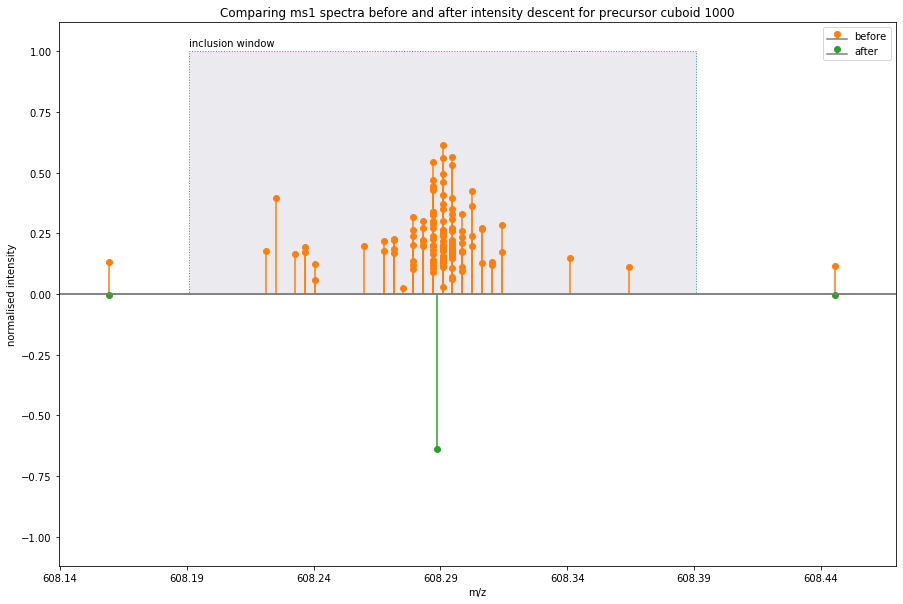

In [78]:
f, ax = plt.subplots()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

markerline, stemlines, baseline = ax.stem(before_df.mz, before_df.normalised_intensity, use_line_collection=True, label='before')
plt.setp(markerline, 'color', colors[1])
plt.setp(stemlines, 'color', colors[1])
plt.setp(baseline, 'color', colors[7])

markerline, stemlines, baseline = ax.stem(after_df.mz, -after_df.normalised_intensity, use_line_collection=True, label='after')
plt.setp(markerline, 'color', colors[2])
plt.setp(stemlines, 'color', colors[2])
plt.setp(baseline, 'color', colors[7])

plt.xlabel('m/z')
plt.ylabel('normalised intensity')
f.set_figheight(10)
f.set_figwidth(15)
plt.xticks(np.arange(before_df.mz.min(),before_df.mz.max(),0.05))

plt.xlim((608.14,608.47))
# plt.ylim((-200,250))

rect = patches.Rectangle((mz_lower,0),MS1_PEAK_DELTA*2,1.0,linewidth=1,linestyle=':',edgecolor=(0.2,0.6,0.6,1.0),facecolor=(0.2,0.2,0.4,0.1),fill=True)
ax.add_patch(rect)
plt.text(mz_lower, 1.02,'inclusion window')

plt.margins(0.06)
plt.legend(loc='best')
plt.title('Comparing ms1 spectra before and after intensity descent for precursor cuboid {}'.format(precursor_id))
plt.show()